## Test 1.1 Visualising location.
In this visualtisation a comparison is made between saved gps positions between Motorola and Sony. The phones are used at the same time and at the same four locations.

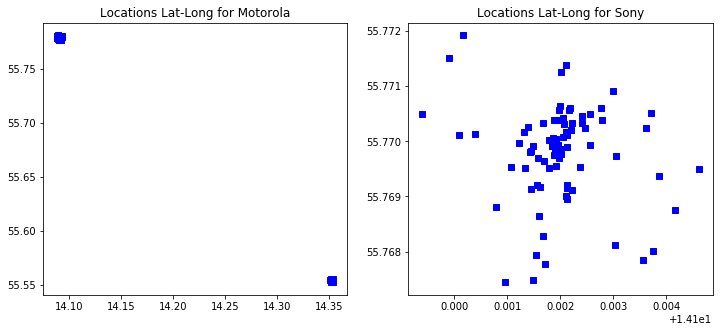

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet1 = pd.read_csv("ehaBtfOPDNZjzy1MEvjQmGo4Zv12_teach_location.csv")
dataSet2 = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location.csv")

trainingData1 = np.array(dataSet1)
trainingData2 = np.array(dataSet2)
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1, 2, 1)
plt.title("Locations Lat-Long for Motorola")
plt.plot(trainingData1[:,1],trainingData1[:,2],'bs')
#plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(1, 2, 2)
plt.title("Locations Lat-Long for Sony")
plt.plot(trainingData2[:,1],trainingData2[:,2],'bs')
#plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## Comparing training results for geohash and lat long.
Teaching data collected by walking between Anna Lindhs Plats and Öresundsvägen and passing the stations Universitetet and Tekniska museet.
Teaching was done using these four stations and expectation was that for all stations a different journey should show up. The result was not as expected and the journeys did not change as expected. First journey was correct second stayed to long until it changed to the third journey. The last one did not show up.
Teaching data in: tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv
The file also contains teaching data for Lund the interesting rows for this test in Malmö is row  800-1000.
Rows are created using 100m around station location.
In the first graph the trained positions are shown. The two clusters in the upper right corner has to 
Learning using lat-long is then compares.

Result training on server:
epoch     train_loss  valid_loss  accuracy
1         1.585488    1.764136    0.030000  
2         1.234845    1.126102    0.820000  
3         0.903974    0.499294    0.850000  
4         0.696824    0.360641    0.850000  
5         0.571501    0.314641    0.880000  
6         0.486392    0.298709    0.890000

Test results.


(200, 11)
55.602337515077544
55.60973989067175


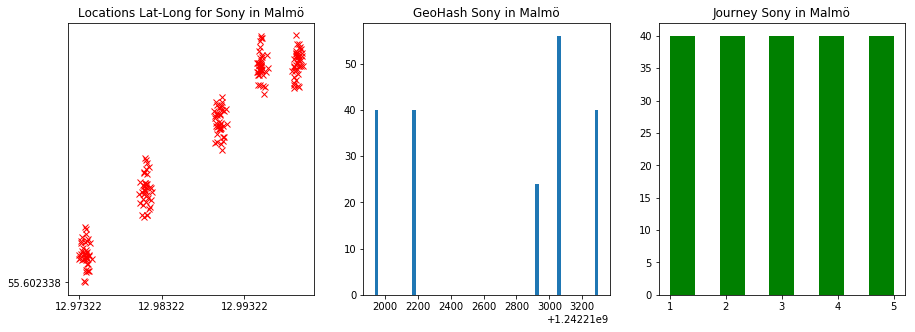

In [55]:
#### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet1 = dataSet.iloc[800:]  #Malmö
#dataSet1 = dataSet.iloc[800:840]  #Malmö
#dataSet1 = dataSet.iloc[840:880]  #Malmö
#dataSet1 = dataSet.iloc[880:920]  #Malmö
#dataSet1 = dataSet1.iloc[440:480]  #Select rows  /Blåtunga o Linegården
#dataSet1=dataSet1.loc[(dataSet1['journey'] == 8180281120) | (dataSet1['journey'] == 8112081802)]
print(dataSet1.shape)
trainingData1 = np.array(dataSet1)
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1,3,1)

plt.title("Locations Lat-Long for Sony in Malmö")
plt.plot(trainingData1[:,1],trainingData1[:,2],'x',color='red')
print(trainingData1[:,2].min())
print(trainingData1[:,2].max())
plt.xticks(np.arange(trainingData1[:,1].min(), trainingData1[:,1].max(), step=0.01))
plt.yticks(np.arange(trainingData1[:,2].min(), trainingData1[:,2].max(), step=0.01))
plt.subplot(1,3,2)
plt.title("GeoHash Sony in Malmö")
plt.hist(trainingData1[:,3],60)
plt.subplot(1,3,3)
plt.title("Journey Sony in Malmö")
journey = dataSet1['journey']
journey = journey.replace(8000080002,1)
journey = journey.replace(8000280071,2)
journey = journey.replace(8007180022,3)
journey = journey.replace(8002280158,4)
journey = journey.replace(8015880000,5)
plt.hist(journey,9,color='green')
plt.show()

epoch,train_loss,valid_loss,accuracy
1,1.284616,1.498768,0.760000
2,0.873496,0.811245,1.000000
3,0.578622,0.221747,1.000000
4,0.396086,0.079577,1.000000
5,0.281936,0.024214,1.000000
6,0.211723,0.033110,1.000000
7,0.166220,0.019938,1.000000
8,0.129702,0.013716,1.000000
9,0.101997,0.011766,1.000000
10,0.080994,0.011491,1.000000


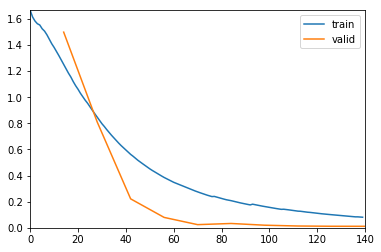

CPU times: user 6.53 s, sys: 5.7 s, total: 12.2 s
Wall time: 13.7 s


In [3]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
sys.path.append("../../code") # go to parent dir
from commuter import *
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:] #Malmö
dataSet = dataSet.sample(frac=1).reset_index(drop=True) #Shuffle
dataSet= make_shure_we_got_enough_rows(dataSet)
dataSet_used = dataSet[['longitude','latitude','journey']]
cont_names =['longitude','latitude']
valid_idx = list(np.random.randint(0,len(dataSet_used),int(len(dataSet_used)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=None, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy
1,1.404192,1.598472,0.220000
2,1.058907,1.383902,0.370000
3,0.836957,0.923766,0.910000
4,0.664765,0.596287,0.910000
5,0.536102,0.372780,0.910000
6,0.461715,0.279154,0.910000
7,0.403614,0.255553,0.910000
8,0.360433,0.249747,0.910000
9,0.323229,0.249148,0.910000
10,0.294537,0.242351,0.910000


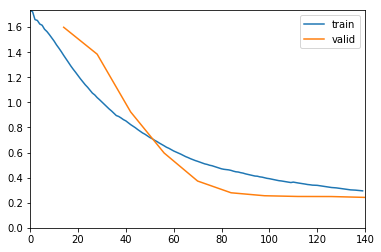

CPU times: user 6.57 s, sys: 5.74 s, total: 12.3 s
Wall time: 13.7 s


In [2]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
sys.path.append("../../code") # go to parent dir
from commuter import *
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:] #Malmö
dataSet = dataSet.sample(frac=1).reset_index(drop=True)
dataSet= make_shure_we_got_enough_rows(dataSet)
dataSet_used = dataSet[['geoHash','journey']]
cont_names =['geoHash']
valid_idx = list(np.random.randint(0,len(dataSet_used),int(len(dataSet_used)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=None, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

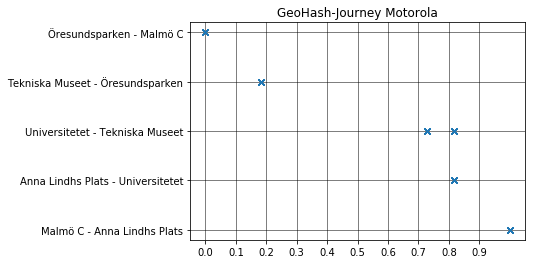

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:]  #Malmö
#dataSet=dataSet.loc[(dataSet['journey'] == 8007180022) | (dataSet['journey'] == 8000280071)]
journey = dataSet[['journey']]
trainingData = np.array(dataSet)
geoHash = (trainingData[:,3] - trainingData[:,3].min())/ (trainingData[:,3].max()- trainingData[:,3].min()) 
plt.title("GeoHash-Journey Motorola")
journey = dataSet['journey'].astype(str)
journey = journey.replace("8000080002","Malmö C - Anna Lindhs Plats")
journey = journey.str.replace("8000280071","Anna Lindhs Plats - Universitetet")
journey = journey.str.replace("8007180022","Universitetet - Tekniska Museet")
journey = journey.replace("8002280158","Tekniska Museet - Öresundsparken")
journey = journey.replace("8015880000","Öresundsparken - Malmö C")
journey = journey.str.replace("9004291069","Kristianstad C-Simrishamn Station")

plt.plot(geoHash,journey,'x')
plt.xticks(np.arange(0, 1, step=0.1))
#plt.rcParams["figure.figsize"] = (20,10)
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [26]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
%matplotlib inline
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
plt.show()

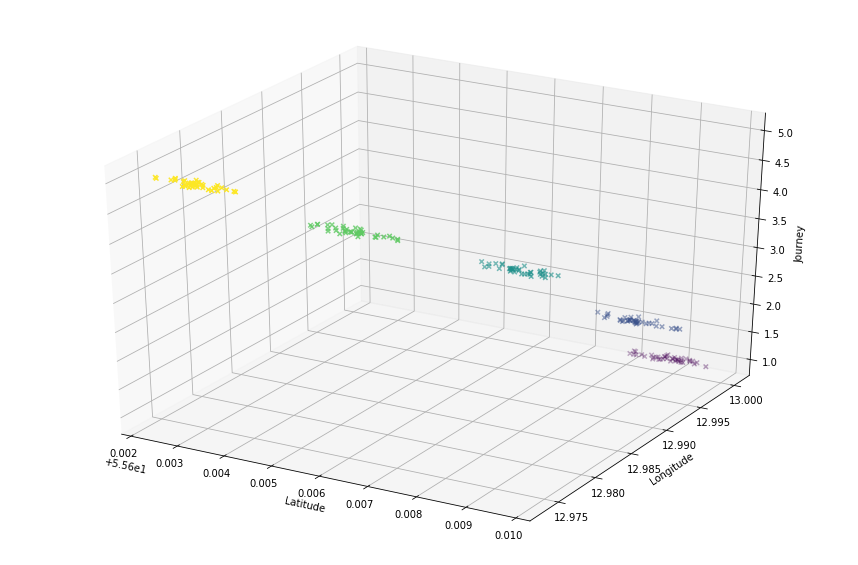

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.figsize = (5,5)
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:]  #Malmö
journey = dataSet['journey']
journey = journey.replace(8000080002,1)
journey = journey.replace(8000280071,2)
journey = journey.replace(8007180022,3)
journey = journey.replace(8002280158,4)
journey = journey.replace(8015880000,5)
latitude = dataSet[['latitude']]
longitude = dataSet[['longitude']]
trainingData = np.array(dataSet)
c=['r','o','b','o','b']
ax.scatter(latitude, longitude, journey, c=journey, marker='x')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Journey')
plt.show()


Distribution around a departure station.
Added rows for all distances fro, 0 to 1000m
Needs a map to be verified correctely.......

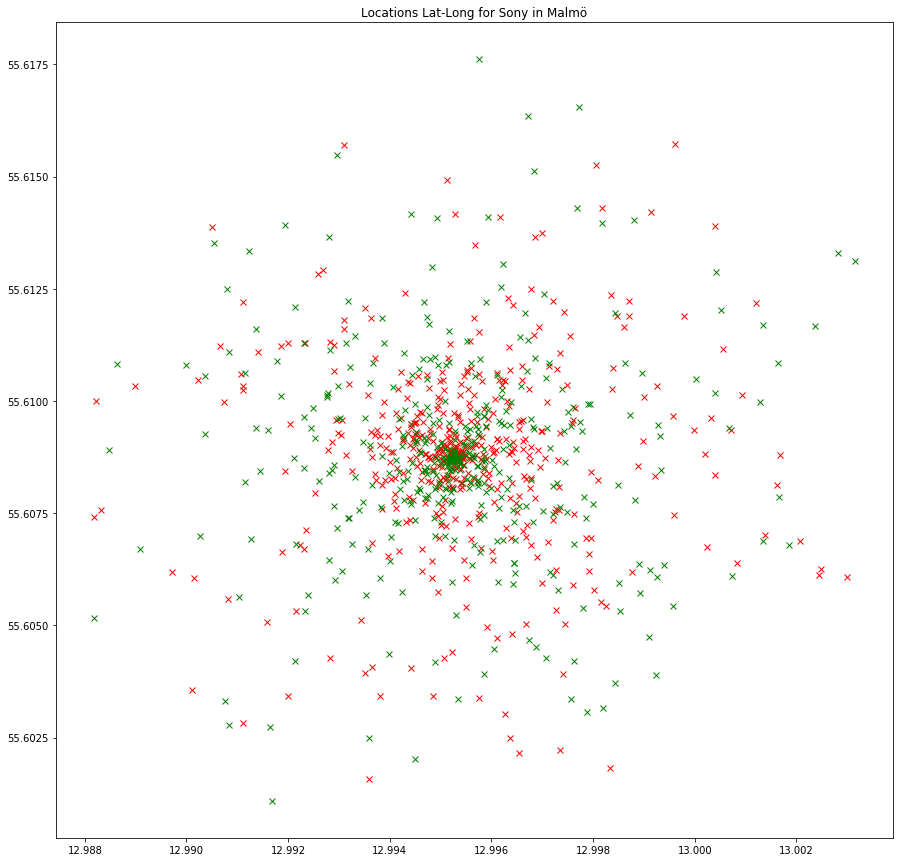

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_station_dist.csv")
dataSet2 = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_your_loc_dist.csv")
#dataSet = dataSet.iloc[0:80] 
#dataSet2 = dataSet2.iloc[0:160] 
trainingData = np.array(dataSet)
trainingData2 = np.array(dataSet2)
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Locations Lat-Long for Sony in Malmö")
plt.plot(trainingData[:,1],trainingData[:,2],'x',color='red')
plt.plot(trainingData2[:,1],trainingData2[:,2],'x',color='green')
plt.show()

8007180022    40
8002280071    40
8000280071    40
Name: journey, dtype: int64


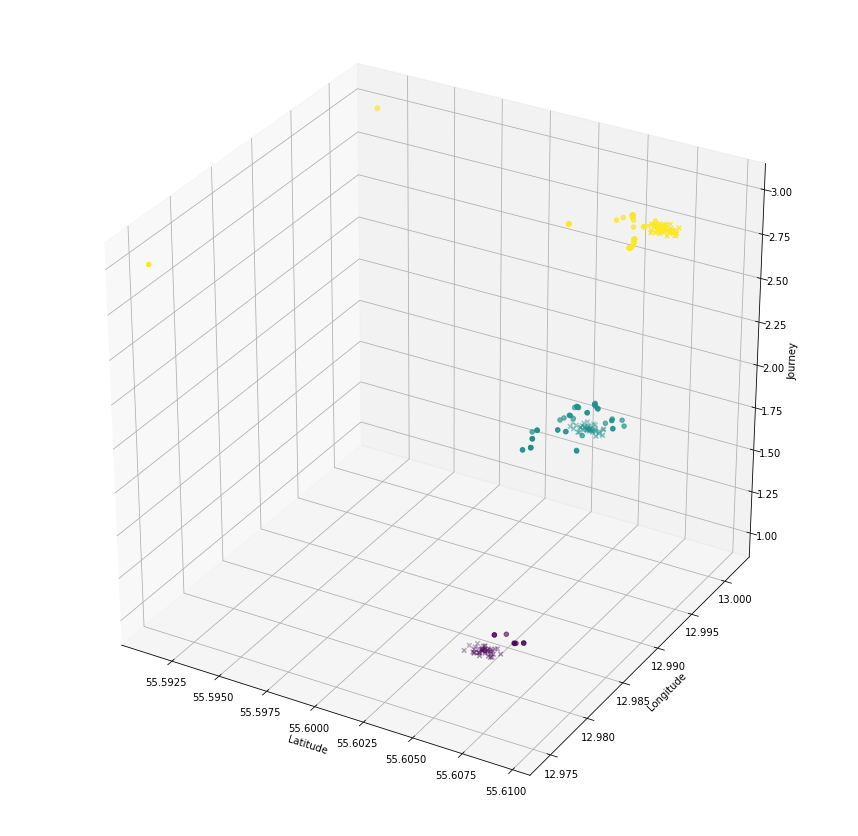

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.figsize = (5,5)
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_all_1.csv")
#dataSet = dataSet.iloc[800:]  #Malmö
journey = dataSet['journey']
hepp=journey.value_counts()
print(hepp)

journey = journey.replace(8002280071,1)
journey = journey.replace(8007180022,2)
journey = journey.replace(8000280071,3)
latitude = dataSet[['latitude']]
longitude = dataSet[['longitude']]
trainingData = np.array(dataSet)
c=['r','o','b']
ax.scatter(latitude, longitude, journey, c=journey, marker='x')
#Predictions set
dataSetPredicted = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
journeyPredicted = dataSetPredicted['predictedjourney']
journeyPredicted = journeyPredicted.replace(8002280071,1)
journeyPredicted = journeyPredicted.replace(8007180022,2)
journeyPredicted = journeyPredicted.replace(8000280071,3)
latitudePredicted = dataSetPredicted[['latitude']]
longitudePredicted = dataSetPredicted[['longitude']]
ax.scatter(latitudePredicted, longitudePredicted, journeyPredicted, c=journeyPredicted, marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Journey')
plt.show()

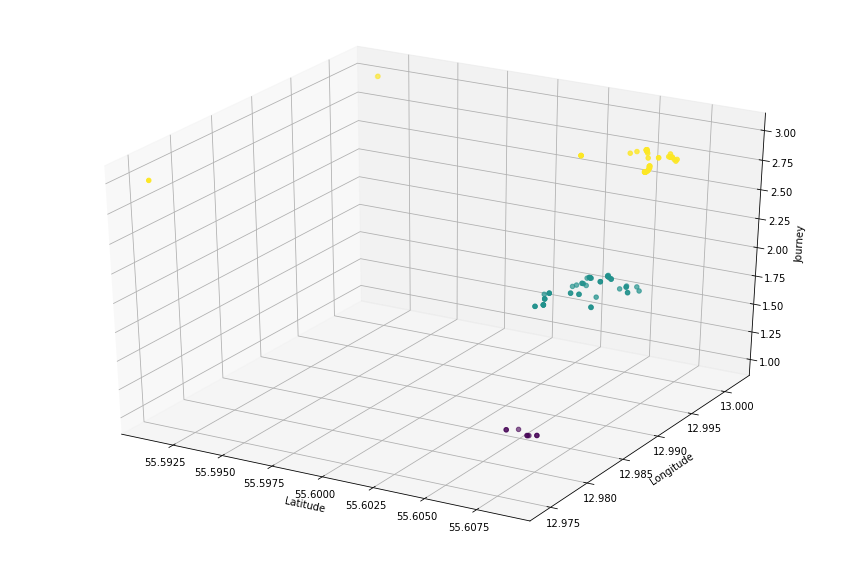

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#fig.figsize = (5,5)
#dataSet = dataSet.iloc[800:]  #Malmö
#journeyPredicted = dataSetPredicted['predictedjourney']
#hepp=journeyPredicted.value_counts()
#print(hepp)
dataSetPredicted = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
journeyPredicted = dataSetPredicted['predictedjourney']
journeyPredicted = journeyPredicted.replace(8002280071,1)
journeyPredicted = journeyPredicted.replace(8007180022,2)
journeyPredicted = journeyPredicted.replace(8000280071,3)
latitudePredicted = dataSetPredicted[['latitude']]
longitudePredicted = dataSetPredicted[['longitude']]
ax.scatter(latitudePredicted, longitudePredicted, journeyPredicted, c=journeyPredicted, marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Journey')
plt.show()

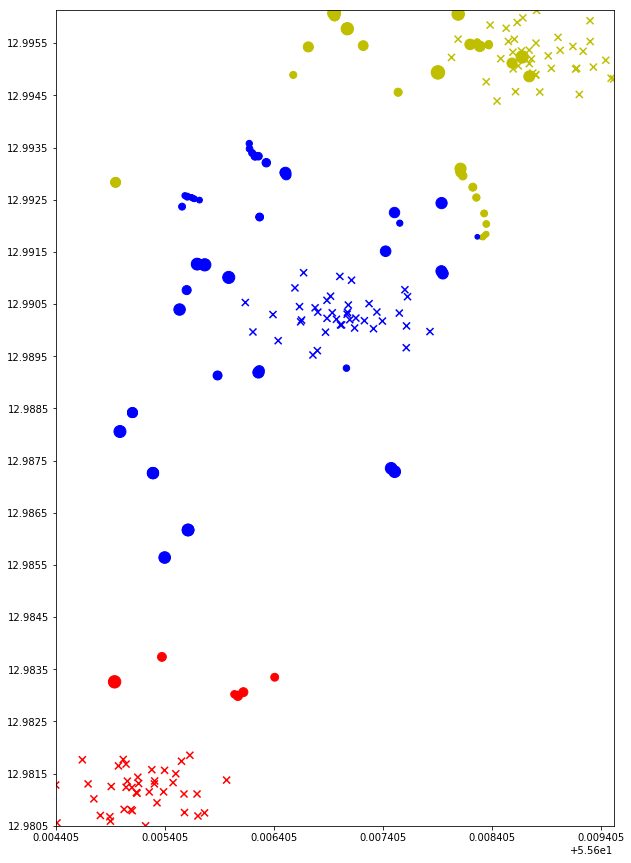

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_all_1.csv")
dataSetPred = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
#Drop outilier data for better visability
dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,15)
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8002280071,'r')
colorsPred = colorsPred.replace(8007180022,'b')
colorsPred = colorsPred.replace(8000280071,'y')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8002280071,'r')
colorsTeach = colorsTeach.replace(8007180022,'b')
colorsTeach = colorsTeach.replace(8000280071,'y')
plt.xticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.001))
plt.yticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.001))

plt.xlim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.ylim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',s=50,c=colorsTeach)

plt.show()

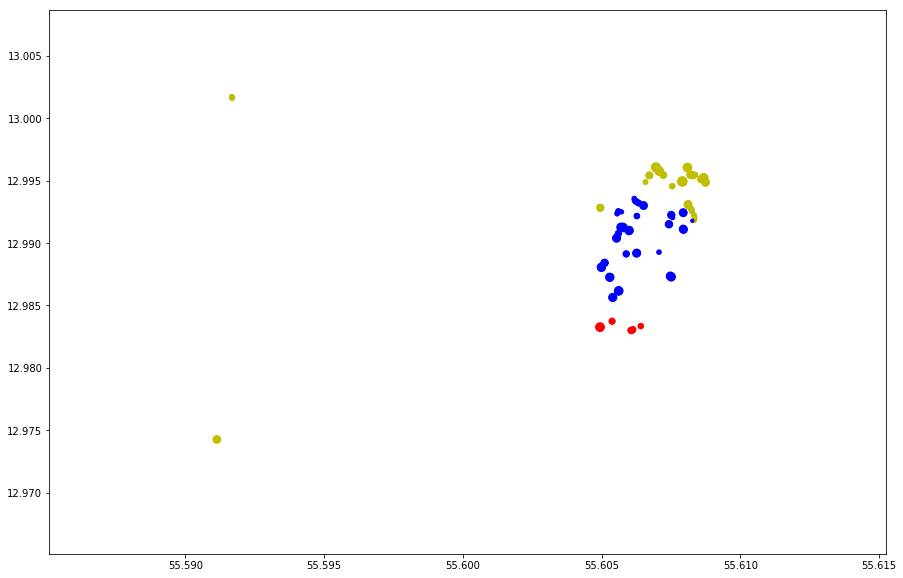

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataSetPredicted3 = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
#dataSetPredicted3 = dataSetPredicted3.iloc[0:9]
colors = dataSetPredicted3['predictedjourney']
colors = colors.replace(8002280071,'r')
colors = colors.replace(8007180022,'b')
colors = colors.replace(8000280071,'y')
plt.scatter(dataSetPredicted3['latitude'], dataSetPredicted3['longitude'], s=dataSetPredicted3['locationAccuracy'], c=colors)

plt.show()

55.77319580143665
55.773214198558435
14.086818600807211
14.086836999909899
9307080000    69
8000081216    15
8324193070     2
Name: predictedjourney, dtype: int64
9307080000    40
8000081216    40
8324193070    40
8121683241    40
Name: journey, dtype: int64


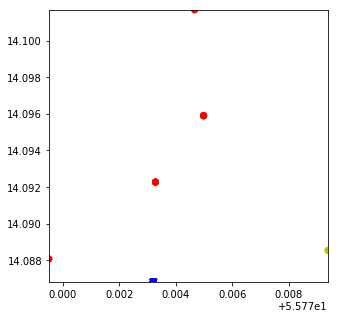

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("ehaBtfOPDNZjzy1MEvjQmGo4Zv12_teach_location_1_5.csv")
dataSetPred = pd.read_csv("ehaBtfOPDNZjzy1MEvjQmGo4Zv12_predict_location_1_5.csv")
print(dataSetTeach['latitude'].min())
print(dataSetTeach['latitude'].max())
print(dataSetTeach['longitude'].min())
print(dataSetTeach['longitude'].max())
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())

hepp=dataSetPred["predictedjourney"].value_counts()
print(hepp)
hepp=dataSetTeach["journey"].value_counts()
print(hepp)
plt.rcParams["figure.figsize"] = (5,5)
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000081216,'r')
colorsPred = colorsPred.replace(9307080000,'b')
colorsPred = colorsPred.replace(8324193070,'y')
colorsPred = colorsPred.replace(8121683241,'y')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000081216,'r')
colorsTeach = colorsTeach.replace(9307080000,'b')
colorsTeach = colorsTeach.replace(8324193070,'y')
colorsTeach = colorsTeach.replace(8121683241,'y')
#plt.xlim(dataSetTeach['latitude'].min(),dataSetTeach['latitude'].max())
#plt.ylim(dataSetTeach['longitude'].min(), dataSetTeach['longitude'].max())

#plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',s=(dataSetPred['locationAccuracy']*5),c=colorsPred)
#plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',s=50,c=colorsTeach)
plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',c=colorsPred)
plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',c=colorsTeach)
plt.show()

55.77158211295662
55.7716005
14.100675400810886
14.100693797753726
8121683241    83
8180581216     2
Name: predictedjourney, dtype: int64
8000081216    40
Name: journey, dtype: int64


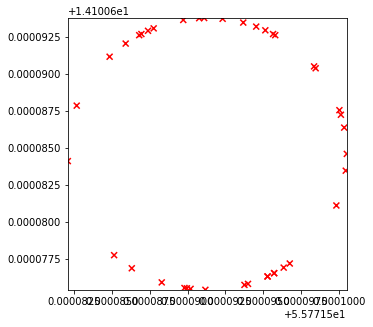

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_5.csv")
dataSetPred = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_location_1_5.csv")
dataSetTeach = dataSetTeach.iloc[0:40]


print(dataSetTeach['latitude'].min())
print(dataSetTeach['latitude'].max())
print(dataSetTeach['longitude'].min())
print(dataSetTeach['longitude'].max())
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())

hepp=dataSetPred["predictedjourney"].value_counts()
print(hepp)
hepp=dataSetTeach["journey"].value_counts()
print(hepp)
plt.rcParams["figure.figsize"] = (5,5)
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000081216,'r')
colorsPred = colorsPred.replace(9307080000,'b')
colorsPred = colorsPred.replace(8324193070,'y')
colorsPred = colorsPred.replace(8121683241,'y')
colorsPred = colorsPred.replace(8180581216,'g')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000081216,'r')
colorsTeach = colorsTeach.replace(9307080000,'b')
colorsTeach = colorsTeach.replace(8324193070,'y')
colorsTeach = colorsTeach.replace(8121683241,'g')
plt.xlim(dataSetTeach['latitude'].min(),dataSetTeach['latitude'].max())
plt.ylim(dataSetTeach['longitude'].min(), dataSetTeach['longitude'].max())
#plt.xlim(dataSetPred['latitude'].min(),dataSetPred['latitude'].max())
#plt.ylim(dataSetPred['longitude'].min(), dataSetPred['longitude'].max())
#plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',s=(dataSetPred['locationAccuracy']*5),c=colorsPred)
#plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',s=50,c=colorsTeach)
#plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',c=colorsPred)
plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',c=colorsTeach)
plt.show()

## Test 1.5 a in Lund 2019-02-27: 17:30

Version: 38

Phone: Motorola
A square (around 100m) and teaching four journeys
* Malmö-Helsingborg
* Helsingborg-Kristianstad'
* Kristianstad-Ystad
* Ystad_ Malmö

Files: Teaching set: hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_teach_1.csv

Predictions: hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_predict_1.csv

100m radius on teaching set.

Comment:
Got prediction error initially 4 app crashes:
NullPointerException (@Parser:fromToByBuss:108) {AsyncTask #1}
Depending on no simcard and no connection.
Also waiting for predictions very long time.


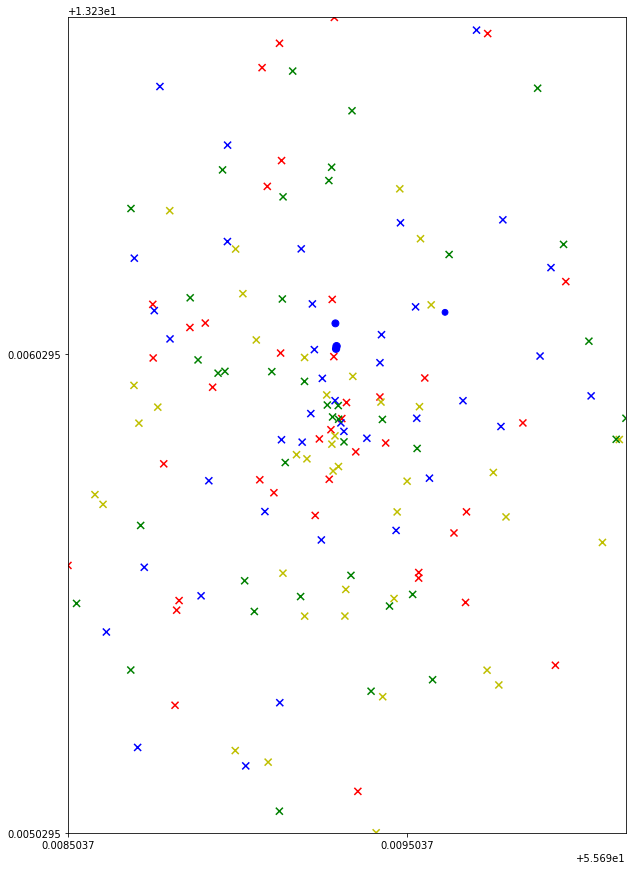

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_teach_1.csv")
dataSetPred = pd.read_csv("hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_predict_1.csv")
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,15)
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000083241,'r')
colorsPred = colorsPred.replace(8324190042,'b')
colorsPred = colorsPred.replace(9004286239,'y')
colorsPred = colorsPred.replace(8623980000,'g')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000083241,'r')
colorsTeach = colorsTeach.replace(8324190042,'b')
colorsTeach = colorsTeach.replace(9004286239,'y')
colorsTeach = colorsTeach.replace(8623980000,'g')
plt.xticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.001))
plt.yticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.001))
plt.xlim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.ylim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',s=50,c=colorsTeach)
plt.show()

## Test 1.5b in Lund 2019-02-27 18:00

Version: 38

Phone: Sony
A square (around 100m) and teaching four journeys
* Malmö-Helsingborg
* Helsingborg-Kristianstad'
* Kristianstad-Ystad
* Ystad_ Malmö

Files: Teaching set: hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_teach_1.csv

Predictions: hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_predict_1.csv

100m radius on teaching set.

Comment: No bugs but expected other distribution centerd around 4 areas.
Action: Train after each teaching so GPS perhaps get updated.


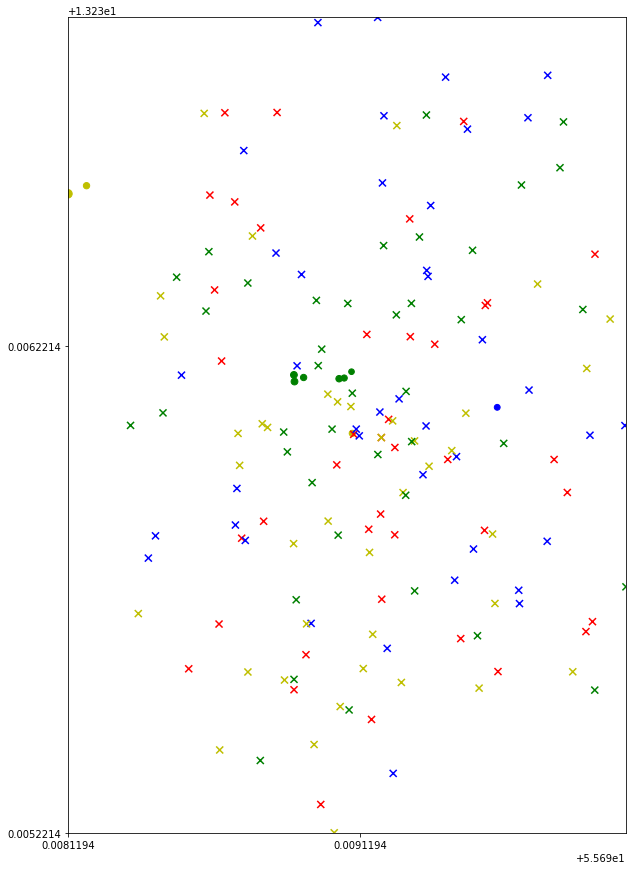

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_1.csv")
dataSetPred = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_1.csv")
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,15)
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000083241,'r')
colorsPred = colorsPred.replace(8324190042,'b')
colorsPred = colorsPred.replace(9004286239,'y')
colorsPred = colorsPred.replace(8623980000,'g')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000083241,'r')
colorsTeach = colorsTeach.replace(8324190042,'b')
colorsTeach = colorsTeach.replace(9004286239,'y')
colorsTeach = colorsTeach.replace(8623980000,'g')
plt.xticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.001))
plt.yticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.001))
plt.xlim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.ylim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',s=50,c=colorsTeach)
plt.show()

## Test 1.5c in Lund 2019-02-27 19:50

Version: 38

Phone: Sony
A square (around 100m) and teaching four journeys
* Malmö-Helsingborg
* Helsingborg-Kristianstad'
* Kristianstad-Ystad
* Ystad_ Malmö

Files: Teaching set: hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_teach_2.csv

Predictions: hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_predict_2.csv

100m radius on teaching set.

Comment: No bugs
* Action: Train after each teaching so GPS perhaps get updated.
* Result looks good (I thaught wrong journeys therefor not exactly same result.) 
* Bug make shure that new lodation is collected every time the teach button is pressed.


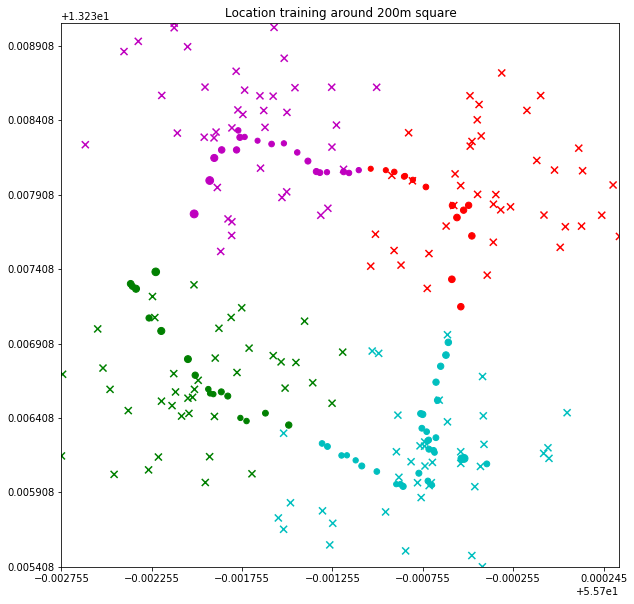

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_teach_2.csv")
dataSetPred = pd.read_csv("hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_predict_2.csv")
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Location training around 200m square")
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000083241,'r')
colorsPred = colorsPred.replace(8324190042,'b')
colorsPred = colorsPred.replace(9004286239,'y')
colorsPred = colorsPred.replace(8623980000,'g')
colorsPred = colorsPred.replace(8324186239,'m')
colorsPred = colorsPred.replace(8000090042,'c')

colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000083241,'r')
colorsTeach = colorsTeach.replace(8324190042,'b')
colorsTeach = colorsTeach.replace(9004286239,'y')
colorsTeach = colorsTeach.replace(8623980000,'g')
colorsTeach = colorsTeach.replace(8324186239,'m')
colorsTeach = colorsTeach.replace(8000090042,'c')
plt.xticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.0005))
plt.yticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.0005))
plt.xlim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.ylim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['latitude'],dataSetPred['longitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['latitude'],dataSetTeach['longitude'],marker='x',s=50,c=colorsTeach)
plt.show()

### Test 1.6a in Maglehem 2019-03-03: 11:63:30
This test is performed to make shure that locations are updated always when "use phone location" is selected.
Version: 39

Phone: Sony
A square and a outilier (around 100m between points) and teaching five journeys
* Malmö-Lund
* Lund-Helsingborg'
* Helsingbork-Kristianstas
* Ystad_ Malmö

Files: Teaching set: tnK534JMwwfhvUEycn69HPbhqkt2_teach_2.csv

Predictions: tnK534JMwwfhvUEycn69HPbhqkt2_predict_2.csv

20m radius around phone location on teaching set.

Comment: No bugs (Testing that teaching points are updated continiously)
* Strange: Takes a little bit longer "Waiting for GPS".
Seems ok, the pink dots among the yellow with yellow predictions indicates that there are teaching locations that are valid for another time.
A little bit strange is that I tried to ask for predictions with even intervalls, but that is not reflected in the prediction set.
Could be investigated.

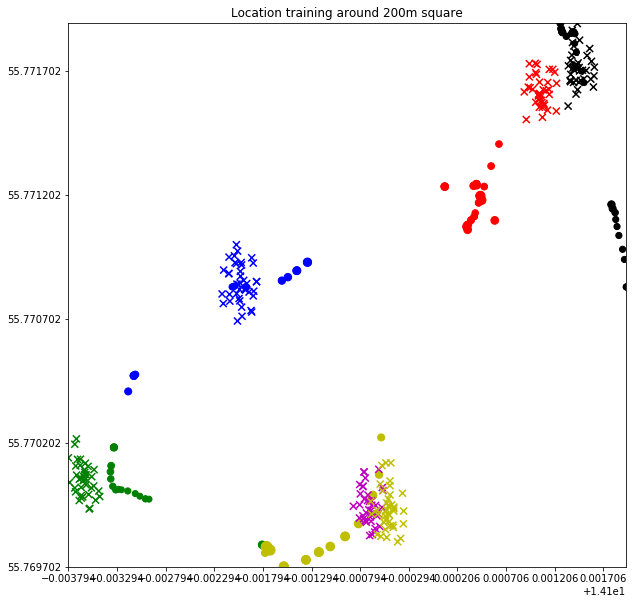

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_2.csv")
dataSetPred = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_2.csv")
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Location training around 200m square")
colorsPred = dataSetPred['predictedjourney']
#colorsPred = colorsPred.replace(8000083241,'r')
colorsPred = colorsPred.replace(8324190042,'b')
#colorsPred = colorsPred.replace(9004286239,'y')
#colorsPred = colorsPred.replace(8623980000,'g')
#colorsPred = colorsPred.replace(8324186239,'m')
colorsPred = colorsPred.replace(8000090042,'c')
colorsPred = colorsPred.replace(8121683241,'r')
colorsPred = colorsPred.replace(9004291069,'g')
colorsPred = colorsPred.replace(8623981216,'y')
colorsPred = colorsPred.replace(8000081216,'k')
colorsPred = colorsPred.replace(9106986239,'m')
colorsTeach = dataSetTeach['journey']
#colorsTeach = colorsTeach.replace(8000083241,'r')
colorsTeach = colorsTeach.replace(8324190042,'b')
#colorsTeach = colorsTeach.replace(9004286239,'y')
#colorsTeach = colorsTeach.replace(8623980000,'g')
#colorsTeach = colorsTeach.replace(8324186239,'m')
colorsTeach = colorsTeach.replace(8000090042,'c')
colorsTeach = colorsTeach.replace(8121683241,'r')
colorsTeach = colorsTeach.replace(9004291069,'g')
colorsTeach = colorsTeach.replace(8623981216,'y')
colorsTeach = colorsTeach.replace(8000081216,'k')
colorsTeach = colorsTeach.replace(9106986239,'m')
plt.yticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.0005))
plt.xticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.0005))
plt.ylim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.xlim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['longitude'],dataSetPred['latitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['longitude'],dataSetTeach['latitude'],marker='x',s=50,c=colorsTeach)
plt.show()

### Test 1.6b in Maglehem 2019-03-03: 11:63:30
This test is performed to make shure that locations are updated always when "use phone location" is selected.
Version: 39

Phone: Motorola
A square and a outilier (around 100m between points) and teaching five journeys
* Malmö-Lund
* Lund-Helsingborg'
* Helsingbork-Kristianstas
* Ystad_ Malmö

Files: Teaching set: tnK534JMwwfhvUEycn69HPbhqkt2_teach_2.csv

Predictions: tnK534JMwwfhvUEycn69HPbhqkt2_predict_2.csv

20m radius around phone location on teaching set.

Comment: No bugs (Testing that teaching points are updated continiously)
* Crap does not update position on Motorola...........

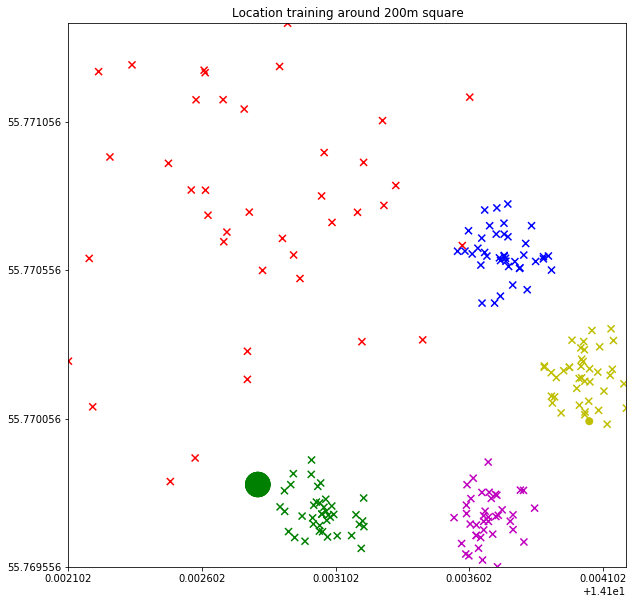

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
dataSetTeach = pd.read_csv("hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_teach_3.csv")
dataSetPred = pd.read_csv("hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_predict_3.csv")
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Location training around 200m square")
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000083241,'r')
colorsPred = colorsPred.replace(8324190042,'b')
colorsPred = colorsPred.replace(9004286239,'y')
colorsPred = colorsPred.replace(8707180000,'g')
#colorsPred = colorsPred.replace(8324186239,'m')
colorsPred = colorsPred.replace(8000090042,'c')
#colorsPred = colorsPred.replace(8121683241,'r')
colorsPred = colorsPred.replace(9004291069,'g')
colorsPred = colorsPred.replace(8623981216,'y')
#colorsPred = colorsPred.replace(8000081216,'k')
colorsPred = colorsPred.replace(9106986239,'m')
colorsPred = colorsPred.replace(8623987071,'m')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000083241,'r')
colorsTeach = colorsTeach.replace(8324190042,'b')
colorsTeach = colorsTeach.replace(9004286239,'y')
colorsTeach = colorsTeach.replace(8707180000,'g')
#colorsTeach = colorsTeach.replace(8324186239,'m')
colorsTeach = colorsTeach.replace(8000090042,'c')
#colorsTeach = colorsTeach.replace(8121683241,'r')
colorsTeach = colorsTeach.replace(9004291069,'g')
#colorsTeach = colorsTeach.replace(8623981216,'y')
colorsTeach = colorsTeach.replace(8000081216,'k')
colorsTeach = colorsTeach.replace(9106986239,'m')
colorsTeach = colorsTeach.replace(8623987071,'m')
plt.yticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.0005))
plt.xticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.0005))
plt.ylim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.xlim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['longitude'],dataSetPred['latitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['longitude'],dataSetTeach['latitude'],marker='x',s=50,c=colorsTeach)
plt.show()

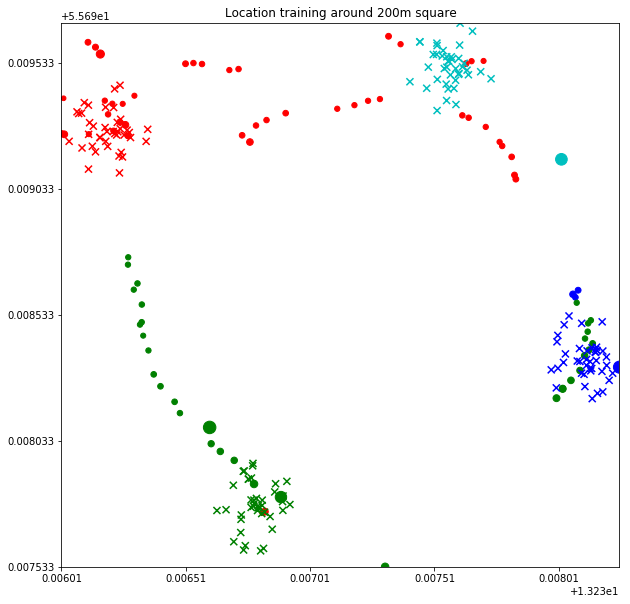

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.title("Locations Lat-Long for Sony in Malmö")
path = "../../../userdata/data/"
#user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2"
user = "tnK534JMwwfhvUEycn69HPbhqkt2"
#user = "XxAWbasBlaP5iiDYGimlQA2rJVE3"
#user = "eXJPoWYDxIc76uemE7Vk3ovBTEG2"
#dataSetTeach = pd.read_csv(path+user+"_teach.csv")
dataSetPred = pd.read_csv(path+user+"_predict.csv")
dataSetTeach = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_3.csv")
#Drop outilier data for better visability
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
#dataSetPred=dataSetPred.drop(dataSetPred['latitude'].idxmin())
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Location training around 200m square")
colorsPred = dataSetPred['predictedjourney']
colorsPred = colorsPred.replace(8000081216,'r')
colorsPred = colorsPred.replace(8324190042,'b')
colorsPred = colorsPred.replace(9004286239,'y')
colorsPred = colorsPred.replace(9106980000,'g')
#colorsPred = colorsPred.replace(8324186239,'m')
colorsPred = colorsPred.replace(8121690042,'c')
#colorsPred = colorsPred.replace(8121683241,'r')
colorsPred = colorsPred.replace(9004291069,'b')
colorsPred = colorsPred.replace(8623981216,'y')
#colorsPred = colorsPred.replace(8000081216,'k')
colorsPred = colorsPred.replace(9106986239,'m')
colorsPred = colorsPred.replace(8623987071,'m')
colorsTeach = dataSetTeach['journey']
colorsTeach = colorsTeach.replace(8000081216,'r')
colorsTeach = colorsTeach.replace(8324190042,'b')
colorsTeach = colorsTeach.replace(9004286239,'y')
colorsTeach = colorsTeach.replace(9106980000,'g')
#colorsTeach = colorsTeach.replace(8324186239,'m')
colorsTeach = colorsTeach.replace(8121690042,'c')
#colorsTeach = colorsTeach.replace(8121683241,'r')
colorsTeach = colorsTeach.replace(9004291069,'b')
#colorsTeach = colorsTeach.replace(8623981216,'y')
colorsTeach = colorsTeach.replace(8000081216,'k')
colorsTeach = colorsTeach.replace(9106986239,'m')
colorsTeach = colorsTeach.replace(8623987071,'m')
plt.yticks(np.arange(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()), max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()), step=0.0005))
plt.xticks(np.arange(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()), step=0.0005))
plt.ylim(min(dataSetPred['latitude'].min(),dataSetTeach['latitude'].min()),max(dataSetPred['latitude'].max(),dataSetTeach['latitude'].max()))
plt.xlim(min(dataSetPred['longitude'].min(),dataSetTeach['longitude'].min()), max(dataSetPred['longitude'].max(),dataSetTeach['longitude'].max()))
plt.scatter(dataSetPred['longitude'],dataSetPred['latitude'],marker='o',s=(dataSetPred['locationAccuracy']*2),c=colorsPred)
plt.scatter(dataSetTeach['longitude'],dataSetTeach['latitude'],marker='x',s=50,c=colorsTeach)
plt.show()

epoch,train_loss,valid_loss,accuracy
1,1.053179,1.305913,0.625000
2,0.633309,0.609091,1.000000
3,0.399379,0.122683,1.000000
4,0.265376,0.035391,1.000000
5,0.184366,0.016494,1.000000
6,0.131621,0.011688,1.000000
7,0.096345,0.009407,1.000000
8,0.071934,0.008537,1.000000
9,0.054763,0.008148,1.000000
10,0.042513,0.008195,1.000000


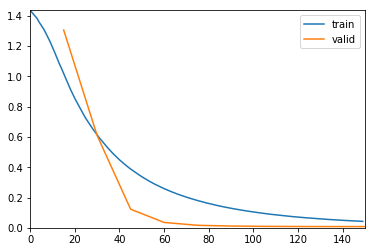

CPU times: user 8.6 s, sys: 8.99 s, total: 17.6 s
Wall time: 20.2 s


In [45]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
sys.path.append("../../code") # go to parent dir
from commuter import *
path = "../../../userdata/data/"
#user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2"
user = "tnK534JMwwfhvUEycn69HPbhqkt2"
#user = "XxAWbasBlaP5iiDYGimlQA2rJVE3"
#user = "eXJPoWYDxIc76uemE7Vk3ovBTEG2"
#dataSet = pd.read_csv(path+user+"_teach.csv")
dep_var = 'journey'
cat_names = ["detectedActivity","weekday"]
#cont_names =["geoHash","minuteOfDay"]
cont_names =["longitude","latitude","minuteOfDay"]
#usecols=['detectedActivity','geoHash','minuteOfDay','weekday','journey']
usecols=['detectedActivity','longitude','latitude','minuteOfDay','weekday','journey']
procs = [FillMissing, Categorify, Normalize]
teachingSetName="_teach.csv"
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_3.csv")
#dataSet = dataSet.iloc[800:] #Malmö
dataSet = dataSet.sample(frac=1).reset_index(drop=True) #Shuffle
dataSet= make_shure_we_got_enough_rows(dataSet)
dataSet_used = dataSet[['longitude','latitude','journey']]
cont_names =['longitude','latitude']
valid_idx = list(np.random.randint(0,len(dataSet_used),int(len(dataSet_used)*0.1)))
data = (TabularList.from_df(dataSet, cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var)
                .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

In [46]:
dataSet = pd.read_csv(path+user+"_predict.csv")
dataSet = dataSet.rename(index=str, columns={"predictedjourney": "journey"})
dataSet.head()
predict_journeys(learner,dataSet)

0.5542168674698795